In [1]:
# general
import pandas as pd
import numpy as np
import re
import ast
from scipy.stats import pearsonr

# library for wiki data
import requests
from bs4 import BeautifulSoup

# visualization library
import seaborn as sns 
import matplotlib.pyplot as plt
import folium
from folium.features import GeoJson
from folium import Choropleth
import geopandas as gpd

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Print versions
import sys
print("Python version:", sys.version)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("scipy version:", __import__('scipy').__version__)
print("requests version:", requests.__version__)
print("beautifulsoup4 version:", __import__('bs4').__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", __import__('matplotlib').__version__)
print("folium version:", __import__('folium').__version__)
print("geopandas version:", gpd.__version__)

Python version: 3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]
pandas version: 2.1.2
numpy version: 1.26.1
scipy version: 1.11.3
requests version: 2.31.0
beautifulsoup4 version: 4.12.2
seaborn version: 0.13.0
matplotlib version: 3.8.1
folium version: 0.15.0
geopandas version: 1.0.0


To ensure full re-runnability, please maintain consistent versions:
- Python version: 3.12.0
- pandas version: 2.1.2
- numpy version: 1.26.1
- scipy version: 1.11.3
- requests version: 2.31.0
- beautifulsoup4 version: 4.12.2
- seaborn version: 0.13.0
- matplotlib version: 3.8.1
- folium version: 0.15.0
- geopandas version: 1.0.0

In [3]:
data_IGN_original = pd.read_csv("./data/IGN_data.csv")
data_IGN_original.head()

,Unnamed: 0,game,developers,publishers,franchises,features,released_date,platform,genres,score,score_text,esrb,esrb_info
0,0,Magic & Mayhem,['Mythos Games'],['Bethesda Softworks'],NaN,"['Memory Card', 'Online']",1999-05-15 00:00:00,['PC'],['Strategy'],7.3,good,Teen,['Animated Violence']
1,1,Fishing Master [2007],['Hudson Soft'],"['Konami', 'Hudson Soft']",NaN,"['Number Of Players', 'Local - VS # of Players']",2006-03-29 00:00:00,['Wii'],['Hunting'],5.5,mediocre,Everyone,['Mild Language']
2,2,Far Cry 2,"['Gameloft', 'Ubisoft Montreal']","['Ubisoft', 'Gameloft']",['Far Cry'],"['Memory Card', 'Vibration', 'DualShock', 'Mem...",2008-10-21 00:00:00,"['Luna', 'PC', 'Wireless', 'Xbox 360', 'PlaySt...",['Shooter'],8.9,great,Mature,"['Intense Violence', 'Drug Reference', 'Strong..."
3,3,Pro 18: World Tour Golf,['Psygnosis'],"['Psygnosis', 'Electro Source']",NaN,"['Number Of Players', 'Memory Card', 'Online']",1999-03-31 00:00:00,"['PC', 'PlayStation']",['Sports'],3.0,awful,Everyone,"['Suitable for Persons Ages Six and Older', 'N..."
4,4,Bust A Groove,['Metro Corporation (aka Metro Graphics)'],"['Sony Computer Entertainment', 'Enix', '989 S...",['Bust a Groove'],"['Number Of Players', 'Memory Card', 'Vibration']",1998-04-27 00:00:00,['PlayStation'],"['Action', 'Music']",9.0,amazing,Everyone,['Mild Language']


In [4]:
data_sale_original = pd.read_csv("./data/Video_Games.csv")
data_sale_original.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_IGN_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11362 entries, 0 to 11361
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11362 non-null  int64  
 1   game           11362 non-null  object 
 2   developers     11050 non-null  object 
 3   publishers     11282 non-null  object 
 4   franchises     6165 non-null   object 
 5   features       8668 non-null   object 
 6   released_date  11307 non-null  object 
 7   platform       11362 non-null  object 
 8   genres         11339 non-null  object 
 9   score          11319 non-null  float64
 10  score_text     11319 non-null  object 
 11  esrb           9490 non-null   object 
 12  esrb_info      8569 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [6]:
data_sale_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# Feature Selection and Cleaning

We remove the columns that are not related to this project purpose, or duplicated along datasets. We also perform cleaning on the game name column of both datasets, which is highly relevant to the datasets merging performance. Some columns contains strings that represent lists (e.g."['Atlus', 'Nordcurrent']"). We convert these strings into actual lists.

In [7]:
def data_cleaning(data_IGN_input, data_sale_input):
    data_IGN, data_sale = data_IGN_input.copy(), data_sale_input.copy()

    # adjust released_date to year format for matching Sale dataset format
    data_IGN['Year_of_Release'] = pd.DatetimeIndex(data_IGN['released_date']).year

    # dropping rows with missing Value of Game and Score
    data_IGN.dropna(subset=['game','score'],how = 'any', inplace = True)
    data_sale.dropna(subset=['Name', 'Global_Sales'], inplace = True)

    # removing the columns that are beyond the project scope
    IGN_Useless_columns = ["Unnamed: 0","developers", "franchises", "features",\
                                            "released_date", "score_text", "esrb_info"]
    data_IGN.drop(columns=IGN_Useless_columns, inplace = True)

    Sale_Useless_columns = ["Genre", "Publisher", \
                                "Critic_Count" , "User_Count", "Developer", "Rating"]
    data_sale.drop(columns=Sale_Useless_columns, inplace = True)

    # remove non-alphabetic characters from game name
    data_IGN['game'] = data_IGN['game'].str.replace('[\!\?\.\:\'\-\~\,\"]', '', regex=True)
    data_sale['Name'] = data_sale['Name'].str.replace('[\!\?\.\:\'\-\~\,\"]', '', regex=True)

    # replace double space to single space
    data_IGN['game'] = data_IGN['game'].str.replace('  ', ' ',)
    data_sale['Name'] = data_sale['Name'].str.replace('  ', ' ',)

    # lower case game names
    data_IGN["game"] = data_IGN["game"].str.strip().str.lower()
    data_sale["Name"] = data_sale["Name"].str.strip().str.lower()

    # convert the columns from string representation of lists to actual lists
    def safe_literal_eval(val):
        if isinstance(val, str) and val.startswith('[') and val.endswith(']'):
            try:
                return ast.literal_eval(val)
            except (ValueError, SyntaxError):
                return val
        return val
        
    for col in ['publishers', 'platform', 'genres']:
        data_IGN[col] = data_IGN[col].apply(safe_literal_eval)

    # convert string column in sale data into numeric
    data_sale['User_Score'] = data_sale['User_Score'].replace('tbd', np.nan)
    data_sale['User_Score'] = pd.to_numeric(data_sale['User_Score'])

    # ensure 'Score' columns are numeric
    for df in [data_IGN_input, data_sale_input]:
        score_columns = [col for col in df.columns if 'Score' in col]
        for col in score_columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # scale critic score to 10-point scale
    data_sale['Critic_Score'] = data_sale['Critic_Score'].apply(lambda x: x / 10)

    return data_IGN, data_sale

data_IGN_clean, data_sale_clean = data_cleaning(data_IGN_original, data_sale_original)

# Merging data

We decided to use game names as the key for merging two datasets. Before merging, we observed inconsistencies in game names. To maximize the number of records preserved after merging, we will standardize these game names, as more identical names will lead to a more accurate merge.

## First challenge
**Some games are published on multiple platform and duplicate, stating with [bracket] or (parenthesis).**

In [8]:
data_IGN_clean[data_IGN_clean["game"] == "grand theft auto v"]

,game,publishers,platform,genres,score,esrb,Year_of_Release
7082,grand theft auto v,[Rockstar Games],"[Xbox Series X|S, PlayStation 5, PC, Xbox One,...","[Action, Adventure]",10.0,Mature,2013.0


In [9]:
data_sale_clean[data_sale_clean["Name"] == "grand theft auto v"]

,Name,Platform,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
16,grand theft auto v,PS3,2013.0,7.02,9.09,0.98,3.96,21.04,9.7,8.2
23,grand theft auto v,X360,2013.0,9.66,5.14,0.06,1.41,16.27,9.7,8.1
42,grand theft auto v,PS4,2014.0,3.96,6.31,0.38,1.97,12.61,9.7,8.3
165,grand theft auto v,XOne,2014.0,2.81,2.19,0.00,0.47,5.48,9.7,7.9
1730,grand theft auto v,PC,2015.0,0.39,0.69,0.00,0.09,1.17,9.6,7.9


### Aggregate game by game name

We will combine these game into single row by
- taking the minimum on the year of release
- take mean on score columns
- averaging other numeric columns
- appending the unique value on the string / list of strings columns

This aggregation logic will be re-use through out the entire project.

In [10]:
# function to flatten lists and get unique values
def unique_values(x):
    flattened_list = []
    for sublist in x:
        if isinstance(sublist, list):
            flattened_list.extend(sublist)
        else:
            flattened_list.append(sublist)
    return list(set(flattened_list))

# function to determine the aggregation method based on the column type
def get_agg_func(column_name, column_data):
    if column_name == 'Year_of_Release':
        return 'min'
    elif 'score' in column_name.lower():
        return 'mean'
    elif np.issubdtype(column_data.dtype, np.number):
        return 'sum'
    elif isinstance(column_data.iloc[0], list):
        return unique_values  # return all unique for list of string
    else:
        return lambda x: ', '.join(map(str, x.unique())) # return all unique for string

In [11]:
def combine_platform(data_IGN_input, data_sale_input):
    data_IGN = data_IGN_input.copy()
    data_sale = data_sale_input.copy()

    # remove bracketed content from game names
    data_IGN["game"] = data_IGN["game"].apply(lambda name: re.sub(r"(\[.*?\]|\(.*?\))", "", name))
    data_sale["Name"] = data_sale["Name"].apply(lambda name: re.sub(r"(\[.*?\]|\(.*?\))", "", name))

    # make sure it is stripped
    data_IGN['game'] = data_IGN['game'].str.strip()
    data_sale['Name'] = data_sale['Name'].str.strip()

    # sort data by Year_of_Release before grouping to ensure 'first' picks the earliest year's score
    data_IGN.sort_values(by='Year_of_Release', inplace=True)
    data_sale.sort_values(by='Year_of_Release', inplace=True)

    # create aggregation dictionaries for each columns, except the group by column
    agg_funcs_IGN = {col: get_agg_func(col, data_IGN[col]) for col in data_IGN.columns if col != 'game'}
    agg_funcs_sale = {col: get_agg_func(col, data_sale[col]) for col in data_sale.columns if col != 'Name'}

    # aggregate data
    data_IGN_aggregated = data_IGN.groupby('game').agg(agg_funcs_IGN).reset_index()
    data_sale_aggregated = data_sale.groupby('Name').agg(agg_funcs_sale).reset_index()

    return data_IGN_aggregated, data_sale_aggregated

data_IGN_single_platform, data_sale_single_platform = combine_platform(data_IGN_clean, data_sale_clean)

In [12]:
data_IGN_single_platform[data_IGN_single_platform["game"] == "grand theft auto v"]

,game,publishers,platform,genres,score,esrb,Year_of_Release
3823,grand theft auto v,[Rockstar Games],"[Xbox 360, PlayStation 3, Xbox Series X|S, PC,...","[Adventure, Action]",10.0,Mature,2013.0


In [13]:
data_sale_single_platform[data_sale_single_platform["Name"] == "grand theft auto v"]

,Name,Platform,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
3684,grand theft auto v,"X360, PS3, PS4, XOne, PC",2013.0,23.84,23.42,1.42,7.9,56.57,9.68,8.08


In [14]:
print("IGN dataset before aggregating platform: ", data_IGN_clean.shape)
print("IGN dataset after aggregating platform: ", data_IGN_single_platform.shape)
print("Sale dataset before aggregating platform: ", data_sale_clean.shape)
print("Sale dataset after aggregating platform: ", data_sale_single_platform.shape)

IGN dataset before aggregating platform:  (11319, 7)
IGN dataset after aggregating platform:  (10870, 7)
Sale dataset before aggregating platform:  (16717, 10)
Sale dataset after aggregating platform:  (11373, 10)


## Second challenge 
Sale dataset use '/' to seperate alternative version of a game in single row,
but IGN dataset seperate alternative version into multiple rows.
We take pokemon red and blue as indication.

In [15]:
data_IGN_single_platform[data_IGN_single_platform["game"].str.contains("Pokemon Red|Pokemon Blue", case = False, na = False)]

,game,publishers,platform,genres,score,esrb,Year_of_Release
6851,pokemon blue version,[Nintendo],"[Nintendo 3DS, Game Boy]",[RPG],10.0,Everyone,1996.0
6867,pokemon red version,[Nintendo],"[Nintendo 3DS, Game Boy]",[RPG],10.0,Everyone,1996.0


In [16]:
data_sale_single_platform[data_sale_single_platform["Name"].str.contains("Pokemon Red", case = False, na = False)]

,Name,Platform,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
7303,pokemon red/pokemon blue,GB,1996.0,11.27,8.89,10.22,1.0,31.37,NaN,NaN


Above output illustrates that Game with alternative versions is counted seperately in IGN dataset,
but as one item in sale dataset. And since it has only one a total sales amount along versions, 
we need to group those alternative versions as one for matching sales dataset.

### Mapping game with alternative versions

From example "Pokemon Red/Pokemon Blue", we can see game with alternative versions is split by a Slash"/".
However, we cannot split the game name by a "slash" since some origin game containing this symbol:

In [17]:
# an example that game name containing the slash
data_sale_single_platform[data_sale_single_platform["Name"].str.contains("summer")].head(1)

,Name,Platform,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
6,1/2 summer +,PSP,2013.0,0.0,0.0,0.01,0.0,0.01,NaN,NaN


We can check if a game name (with slash symbol) exist in both dataset, which mean that slash symbol is not an presentation of alternative versions, and then apply mappnig to game name:

In [18]:
def mapping_game_name(IGN_name_input, Sale_name):
    
    mapping = {} # mapping_set

    # remove "Version" term
    IGN_name = IGN_name_input.apply(lambda name: re.sub(r"\ version$", "", name))

    # create a name set prepared for quick check
    ign_game_set = set(IGN_name)

    # only split if the game does not exist in the IGN set
    for game in Sale_name:
        if '/' in game and game not in ign_game_set:
            parts = game.split('/')
            for part in parts:
                mapping[part.strip()] = game

    return IGN_name.map(mapping).fillna(IGN_name) # return apply mapping

data_IGN_single_platform['mapped_game'] = mapping_game_name(data_IGN_single_platform["game"], \
                                                            data_sale_single_platform["Name"])
data_IGN_single_platform['mapped_game'] = data_IGN_single_platform['mapped_game'].str.strip().str.replace('  ', ' ',)

Verify for game mapping:

In [19]:
data_IGN_single_platform[data_IGN_single_platform["game"].str.contains("Pokemon Red|Pokemon Blue", \
                                                                case = False, na = False)][["game",'mapped_game']]

,game,mapped_game
6851,pokemon blue version,pokemon red/pokemon blue
6867,pokemon red version,pokemon red/pokemon blue


And to prevent duplication, we will group them as one, base on mapped game name.

In [20]:
def combine_mapped_game(df_input):
    df = df_input.copy()

    # we are no longer use "Name" column.
    df.drop(columns="game", inplace = True)

    # create aggregation dictionaries for each columns
    agg_funcs = {col: get_agg_func(col, df[col]) for col in df.columns if col != 'mapped_game'}
    
    # perform the groupby and aggregation
    df = df.groupby('mapped_game').agg(agg_funcs).reset_index()

    return df

data_IGN_mapped = combine_mapped_game(data_IGN_single_platform)

Verify that duplicated mapped game names merge into single row.

In [21]:
data_IGN_mapped[data_IGN_mapped["mapped_game"].str.contains("Pokemon Red", case = False, na = False)]

,mapped_game,publishers,platform,genres,score,esrb,Year_of_Release
6865,pokemon red/pokemon blue,[Nintendo],"[Nintendo 3DS, Game Boy]",[RPG],10.0,Everyone,1996.0


## Merging

Now we are ready to merge base on those mapped game name:

In [22]:
# joining two dataset with mapped game name, take their intersection
merged_df = pd.merge(
    data_IGN_mapped,
    data_sale_single_platform,
    left_on='mapped_game',
    right_on='Name',
    how='inner'
)
merged_df.head()

,mapped_game,publishers,platform,genres,score,esrb,Year_of_Release_x,Name,Platform,Year_of_Release_y,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,007 racing,[Electronic Arts],[PlayStation],[Racing],5.0,Teen,2000.0,007 racing,PS,2000.0,0.30,0.20,0.00,0.03,0.53,5.1,4.6
1,007 the world is not enough,[Electronic Arts],[Nintendo 64],"[Adventure, Shooter, Action]",8.9,Teen,2000.0,007 the world is not enough,"PS, N64",2000.0,1.64,0.73,0.02,0.09,2.47,6.1,6.7
2,007 tomorrow never dies,[Electronic Arts],[PlayStation],"[Action, Shooter]",5.0,Teen,1999.0,007 tomorrow never dies,PS,1999.0,1.72,1.33,0.00,0.16,3.21,NaN,NaN
3,101in1 explosive megamix,"[Atlus, Nordcurrent]","[Wii, Nintendo DS]","[Puzzle, Compilation]",2.5,Everyone,2008.0,101in1 explosive megamix,DS,2008.0,0.05,0.12,0.00,0.02,0.19,4.6,NaN
4,1701 ad,"[Deep Silver, Disney Interactive Studios, Touc...","[PC, Wii, Nintendo DS]",[Simulation],8.2,Rating Pending,2006.0,1701 ad,PC,2006.0,0.00,0.25,0.00,0.04,0.30,7.9,8.3


Check for duplication

In [23]:
merged_df[merged_df['mapped_game'].duplicated(keep=False)]

,mapped_game,publishers,platform,genres,score,esrb,Year_of_Release_x,Name,Platform,Year_of_Release_y,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score


In [24]:
print("Merged dataset: ", merged_df.shape)

Merged dataset:  (4934, 17)


To evaluate whether the preprocessing is sufficient to handle game name inconsistencies for merging, we use the function below to check unmerged game names with high similarity.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def fail_to_merge(data_IGN, data_sale, sim_threshold):
    # function to check the game name with high cosine similarity
    # can be used to identify which game exists in both datasets but fail to merge together

    # outer merge two df to get those fail marge game name
    outer_merge = pd.merge(data_IGN, data_sale, left_on='mapped_game', right_on='Name', how='outer')
    fail_merge = outer_merge[(outer_merge['mapped_game'].isnull()) | (outer_merge['Name'].isnull())]

    fail_IGN =  fail_merge['mapped_game'].dropna().to_list()
    fail_sale = fail_merge['Name'].dropna().to_list()

    # convert the game name to TF-IDF vectors
    vectorizer = TfidfVectorizer().fit(fail_IGN + fail_sale)
    tfidf_matrix1 = vectorizer.transform(fail_IGN)
    tfidf_matrix2 = vectorizer.transform(fail_sale)

    # calculate cosine similarity between the two game name
    cosine_sim = cosine_similarity(tfidf_matrix1, tfidf_matrix2)

    # find pairs with cosine similarity greater than a threshold
    result = []
    for i in range(len(fail_IGN)):
        for j in range(len(fail_sale)):
            if cosine_sim[i, j] > sim_threshold:
                result.append((fail_IGN[i], fail_sale[j], cosine_sim[i, j]))

    result_df = pd.DataFrame(result, columns=['IGN dataset name', 'sale dataset name', 'cos similarity'])

    return result_df

check_for_fail_merge = fail_to_merge(data_IGN_mapped, data_sale_single_platform, 0.99)
check_for_fail_merge.head()

,IGN dataset name,sale dataset name,cos similarity
0,call of duty,call of duty 2,1.0
1,call of duty black ops 4,call of duty black ops 3,1.0
2,contra,contra 4,1.0
3,crash bandicoot warped,crash bandicoot 3 warped,1.0
4,crazy machines 2,crazy machines,1.0


### Remove unnecessary columns after merging

1. We observed that there are discrepancies in the year of release between the datasets. We have decided to always take the earlier date because it likely represents the initial release of the game. This date is often the most significant for sales spikes and initial reviews.
2. We also noticed that most columns from the IGN dataset provide more detailed information, including publisher, platform, and genres. Therefore, we will retain these columns from the IGN dataset and remove the corresponding columns from the sales dataset. Additionally, as the game names are already consistent after merging, we will simply keep the game name from the IGN dataset.
3. We will rename some columns for better readability.

In [26]:
# games that have different release date from two datasets
merged_df[merged_df["Year_of_Release_x"] != merged_df["Year_of_Release_y"]][['mapped_game', 'Year_of_Release_x', 'Year_of_Release_y']].head()

,mapped_game,Year_of_Release_x,Year_of_Release_y
6,1942,1986.0,1985.0
7,2 games in 1 double pack hot wheels velocity x...,2003.0,2005.0
8,2 in 1 combo pack sonic heroes / super monkey ...,2005.0,2004.0
12,24 the game,2005.0,2006.0
16,4 elements,2008.0,2009.0


In [27]:
def remove_unnecessary_columns(df_input):
    df = df_input.copy()

    # get earlier release year
    df['Year_of_Release'] = df[['Year_of_Release_x', 'Year_of_Release_y']].apply(lambda x: np.nanmin(x), axis=1)
    df.drop(columns=['Year_of_Release_x', 'Year_of_Release_y'], inplace=True)

    # remove unnecessary columns from sale dataset
    df.drop(columns=['Name', 'Platform'], inplace=True)

    # convert float to int
    df['Year_of_Release'] = df['Year_of_Release'].astype(int)

    # rename columns
    rename_dict = {
        'mapped_game': 'Game',
        'publishers': 'Publishers',
        'platform': 'Platforms',
        'genres': 'Genres_IGN',
        'score': 'IGN_Score',
        'esrb': 'ESRB_Rating'
    }
    df.rename(columns=rename_dict, inplace=True)

    return df

merged_clean_df = remove_unnecessary_columns(merged_df)
merged_clean_df.head()

,Game,Publishers,Platforms,Genres_IGN,IGN_Score,ESRB_Rating,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Year_of_Release
0,007 racing,[Electronic Arts],[PlayStation],[Racing],5.0,Teen,0.30,0.20,0.00,0.03,0.53,5.1,4.6,2000
1,007 the world is not enough,[Electronic Arts],[Nintendo 64],"[Adventure, Shooter, Action]",8.9,Teen,1.64,0.73,0.02,0.09,2.47,6.1,6.7,2000
2,007 tomorrow never dies,[Electronic Arts],[PlayStation],"[Action, Shooter]",5.0,Teen,1.72,1.33,0.00,0.16,3.21,NaN,NaN,1999
3,101in1 explosive megamix,"[Atlus, Nordcurrent]","[Wii, Nintendo DS]","[Puzzle, Compilation]",2.5,Everyone,0.05,0.12,0.00,0.02,0.19,4.6,NaN,2008
4,1701 ad,"[Deep Silver, Disney Interactive Studios, Touc...","[PC, Wii, Nintendo DS]",[Simulation],8.2,Rating Pending,0.00,0.25,0.00,0.04,0.30,7.9,8.3,2006


# Aggregation

After merging, it's time to aggregate the datasets in order to perform analysis on different scope.

## Publisher

When aggregating game data by publisher and release year, we must account for games with multiple publishers. Simply exploding the list of publishers into duplicate rows can inflate sales and count values, as each publisher row would duplicate these values. To address this, we divide the sum of sales and count values by the number of publishers before exploding, ensuring accurate reflection of each publisher's contribution. For score-related columns, we simply use mean for aggregation without dividing the number of publishers before exploding.

In [28]:
def agg_by_publisher_releaseYear(df_input):
    df = df_input.copy()
    df = df.dropna(subset=['Publishers'])

    # drop columns that are not in use in publisher aggregation
    df = df.drop(columns=['Game', 'Platforms', 'Genres_IGN', 'ESRB_Rating'])

    # divide sale and count columns by the number of publishers
    columns_to_divide = [col for col in df.columns if ('Sales' in col) or ('Count' in col)]
    df[columns_to_divide] = df.apply(
        lambda row: row[columns_to_divide] / len(row['Publishers']), axis=1
    )

    # explode the 'Publishers' column to break lists into multiple rows, and Standandize Publisher name's style
    df = df.explode('Publishers')
    df = df.dropna(subset=['Publishers'])
    df["Publishers"] = df["Publishers"].apply(lambda publisher: publisher.strip().lower())
    # remove double space
    df["Publishers"] = df["Publishers"].replace(r'\s+', ' ', regex=True)

    # we manually checked that microsoft has different name that can be combine
    df['Publishers'] = df['Publishers'].str.replace('microsoft game studios', 'microsoft')

    # create a dictionary of aggregation functions for each column for IGN_data
    agg_funcs = {col: get_agg_func(col, df[col]) for col in df.columns if not col in ['Publishers', 'Year_of_Release']}

    df = df.groupby(['Publishers', 'Year_of_Release']).agg(agg_funcs).reset_index()

    return df

publisher_df = agg_by_publisher_releaseYear(merged_clean_df)

publisher_df.head()

,Publishers,Year_of_Release,IGN_Score,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,10tacle studios,2008,7.500000,0.000,0.010000,0.00,0.000,0.015,6.900000,7.000000
1,10tacle studios,2009,6.900000,0.000,0.006667,0.00,0.000,0.010,6.700000,5.800000
2,11 bit studios,2014,8.400000,0.000,0.010000,0.00,0.000,0.020,NaN,NaN
3,1c entertainment,2007,7.000000,0.000,0.005000,0.00,0.000,0.005,6.600000,6.200000
4,1c entertainment,2009,6.933333,0.445,0.310000,0.02,0.105,0.870,6.577778,6.341667


## Country

We first extract a list of country with publisher from wiki. We also perform come cleaning on publisher name as this can increase the merging performance.

In [29]:
# get country from wiki

def get_country_of_publishers():
    url = "https://en.wikipedia.org/wiki/List_of_video_game_publishers"

    # send a GET request to the URL
    response = requests.get(url)

    # parse the HTML content of the page
    soup = BeautifulSoup(response.content, 'html.parser')

    # find the table containing the list of publishers
    table = soup.find('table', {'class': 'wikitable sortable'})

    publishers = []
    countries = []

    for row in table.find_all('tr')[1:]:  # skip the header row
        columns = row.find_all('td')
        if len(columns) > 1:
            publisher = columns[0].text.strip()
            country = columns[1].text.strip()
            publishers.append(publisher)
            countries.append(country)

    df = pd.DataFrame({
        'Publishers': publishers,
        'City': countries
    })

    # standardize Publisher name's style
    df["Publishers"] = df["Publishers"].apply(lambda publisher: publisher.strip().lower()).astype(str)

    # grabbing the Country from string data
    df["City"] = df["City"].str.split(',').tolist()
    df["Country"] = df["City"].apply(lambda x: x[-1])
    df.drop(columns=["City"], inplace=True)

    # clean country name
    replacements = {
        'California United States': 'United States of America',
        'California': 'United States of America',
        'Washington': 'United States of America',
        'Illinois': 'United States of America',
        'Texas': 'United States of America',
        'New York City': 'United States of America',
        'Florida': 'United States of America',
        'United States': 'United States of America',
        'United Kingdoms': 'United Kingdom',
        'England': 'United Kingdom',
        'Czech Republic': 'Czechia',
        'The Netherlands': 'Netherlands',
        'Amsterdam': 'Netherlands',
        'Republic of Korea': 'South Korea',
        'Korea': 'South Korea'
    }
    df['Country'] = df['Country'].str.strip()
    df['Country'] = df['Country'].replace(replacements)

    return df

data_publisher_country = get_country_of_publishers()
data_publisher_country.head()

,Publishers,Country
0,07th expansion,Japan
1,11 bit studios,Poland
2,1c company,Russia
3,20th century games,United States of America
4,2k games,United States of America


In [30]:
# merge publisher aggregated df with the wiki country list
publisher_country_merge = pd.merge(publisher_df, data_publisher_country, how='inner')
publisher_country_merge.head()

,Publishers,Year_of_Release,IGN_Score,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score,Country
0,11 bit studios,2014,8.400000,0.000000,0.010000,0.00,0.000000,0.020000,NaN,NaN,Poland
1,2k games,2004,5.766667,0.182500,0.060333,0.00,0.021333,0.267500,4.516667,5.100000,United States of America
2,2k games,2005,7.118182,0.845000,0.420000,0.00,0.088333,1.348333,6.929167,7.459091,United States of America
3,2k games,2006,5.800000,0.385833,0.101667,0.00,0.053333,0.537500,5.657143,6.328571,United States of America
4,2k games,2007,7.012500,3.108333,1.450000,0.04,0.586667,5.170000,7.414583,7.050000,United States of America


We now aggregate by country

In [31]:
def agg_by_country(df_input):
    df = df_input.copy()

    df = df.drop(columns=['Year_of_Release', 'Publishers'])

    agg_funcs = {col: get_agg_func(col, df[col]) for col in df.columns if col != 'Country'}

    df = df.groupby('Country').agg(agg_funcs).reset_index()

    return df

country_df = agg_by_country(publisher_country_merge)
country_df.head()

,Country,IGN_Score,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,User_Score
0,Australia,6.166667,0.028125,0.001250,0.0,0.000625,0.029375,NaN,NaN
1,Austria,7.541667,1.385000,0.648333,0.0,0.223333,2.263333,7.368056,7.720833
2,Canada,6.085714,0.274381,0.171905,0.0,0.036429,0.493310,6.228571,7.136111
3,Cyprus,7.500000,0.000000,0.260000,0.0,0.050000,0.320000,8.000000,4.450000
4,Czechia,7.000000,0.000000,0.100000,0.0,0.010000,0.110000,7.400000,7.400000


In [32]:
print('Number of unqiue country in our df is', len(country_df['Country'].unique()))

Number of unqiue country in our df is 17


# Analysis

## Correlation of IGN score and global sales

Checking the number of game entries for each year in dataset

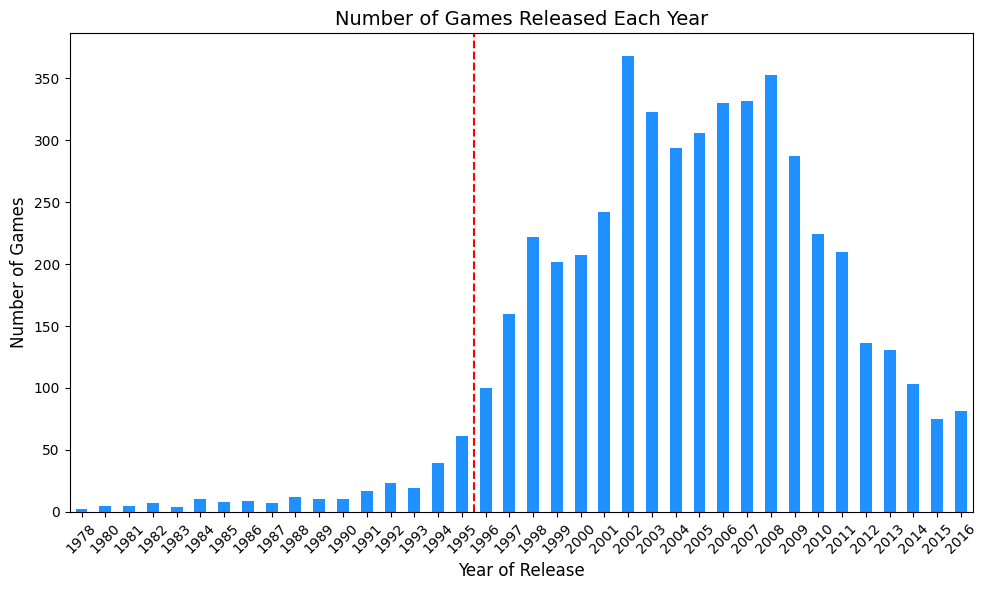

In [33]:
# Check for the occurrence of each release year
def data_occurrence(df):
    year_counts = df.copy()['Year_of_Release'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    year_counts.plot(kind='bar', color='dodgerblue')
    year_list = sorted(df.copy()['Year_of_Release'].unique())
    index_of_1996 = year_list.index(1996) - 0.5  # adjusting to place the line between 1995 and 1996

    #Adding line the indicate before and after IGN started
    plt.axvline(x=index_of_1996, color='red', linestyle='--', label='IGN Active Review Starts') 
    plt.title('Number of Games Released Each Year', fontsize=14)
    plt.xlabel('Year of Release', fontsize=12)
    plt.ylabel('Number of Games', fontsize=12)
    plt.xticks(rotation=45)  # rotate the x-axis labels for better readability
    plt.tight_layout()
    plt.show()

data_occurrence(merged_clean_df)


Taking the view of correlation of score and sale data.

<Figure size 1000x600 with 0 Axes>

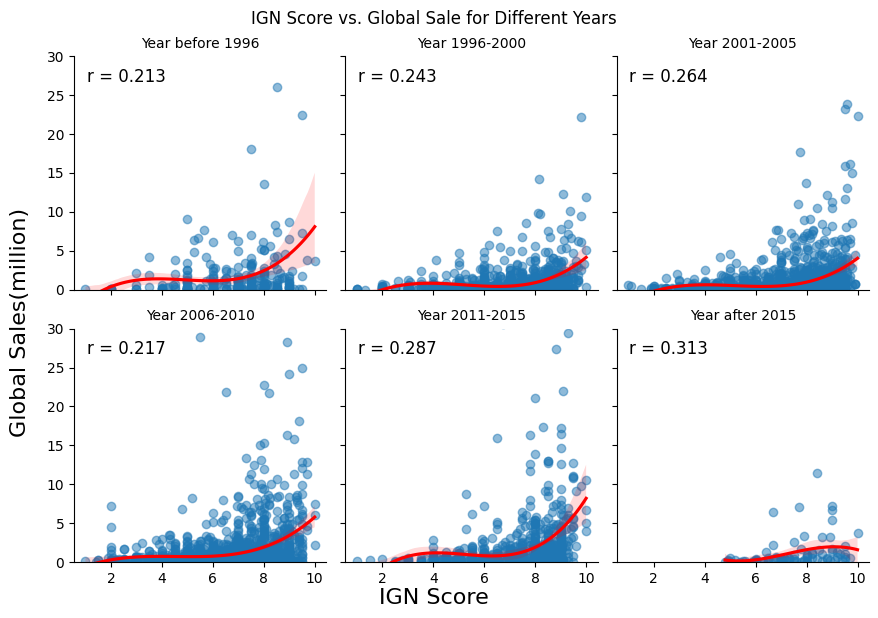

In [34]:
def Correlation_score_sales(df):
    correlation_df = df.copy()
    min_year_in_data = int(correlation_df['Year_of_Release'].min())
    max_year = int(correlation_df['Year_of_Release'].max())

    # create bin edges that start from the minimum year up to before 1996, 
    # and then after 2015
    if min_year_in_data < 1996:
        bin_edges = [min_year_in_data, 1996] + list(range(2001, 2021, 5)) 
    else:
        bin_edges = list(range(1996, 2021, 5))

    # ensure the last bin captures everything after 2015 up to the maximum year
    bin_edges.append(max_year + 1)

    # define labels for these group
    bin_labels = ['before 1996'] if min_year_in_data < 1996 else []
    bin_labels += [f'{start}-{start+4}' for start in range(1996, 2016, 5)]
    if max_year >= 2016:
        bin_labels.append('after 2015')

    # bin_edges = sorted(set(bin_edges))
    correlation_df['5-Year Bin'] = pd.cut(correlation_df['Year_of_Release'], \
                                            bins=bin_edges, labels=bin_labels, right=False)
    plt.figure(figsize=(10, 6))
    # create the FacetGrid
    g = sns.FacetGrid(correlation_df, col="5-Year Bin", col_wrap=3, height=3)

    # function for calculating for correlation coefficient and 
    def scatter_with_regression(x, y, **kwargs):
        corr, _ = pearsonr(x, y)
        label = f'r = {corr:.3f}'
        sns.regplot(x=x, y=y, order=3, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, **kwargs)
        plt.gca().text(0.05, 0.95, label, transform=plt.gca().transAxes, \
                        ha='left', va='top', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

    # map the custom function to the grid
    g.map(scatter_with_regression, "IGN_Score", "Global_Sales")

    # set the titles and labels
    g.fig.suptitle('IGN Score vs. Global Sale for Different Years', y=1.02)
    g.set_titles('Year {col_name}')
    g.set(ylim=(0, 30))

    # remove subplot label and name a new one.
    g.set_axis_labels(" ", " ")
    # X-axis label
    g.fig.text(0.5, 0.04, 'IGN Score', ha='center', va='center', fontsize=16) 
    # Y-axis label
    g.fig.text(0.04, 0.5, 'Global Sales(million)', \
                ha='center', va='center', rotation='vertical', fontsize=16)  
    g.fig.subplots_adjust(left = 0.1, bottom = 0.1)

    plt.show()
    
Correlation_score_sales(merged_clean_df)

## Score trending and uncertainty analysis

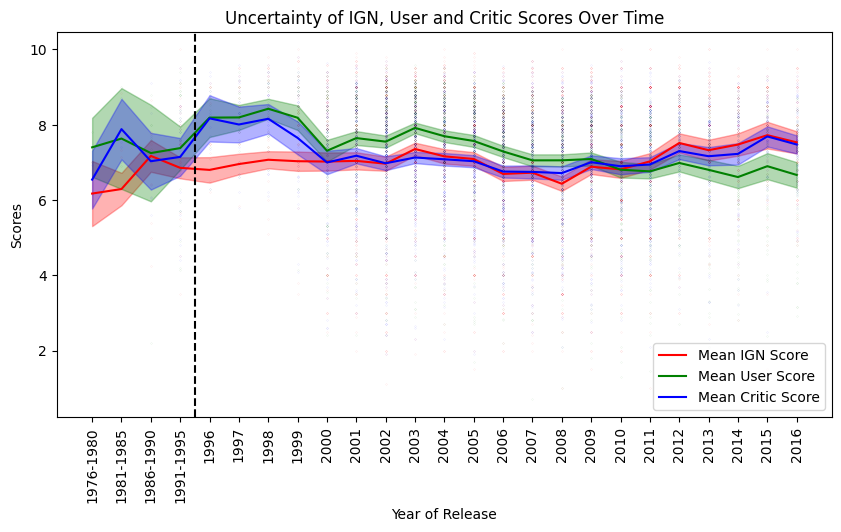

In [35]:
def Confidence_Interval(group):
    group = group.dropna()
    n = len(group)
    mean = np.mean(group)
    std = np.std(group, ddof=1)

    # take confidence level as 0.95 
    ci_lower = mean - 1.96 * std/np.sqrt(n)
    ci_upper = mean + 1.96 * std/np.sqrt(n)
    
    return pd.DataFrame({
        'Mean': [mean],
        'CI Lower Bound': [ci_lower],
        'CI Upper Bound': [ci_upper]
    })

# aggregate every 5 years before 1996
def year_to_group(year):
    if year < 1978:
        return "before 1978"
    elif year < 1996:
        # starting from 1995, create groups backwards in 5-year intervals
        max_year = 1995
        while year <= max_year:
            if year > max_year - 5:
                return f"{max_year-4}-{max_year}"
            max_year -= 5
    else:
        return str(year)

def uncertainty_chart(df_input, IGN_color, user_color, critic_color, area_alpha, point_alpha):
    df = df_input.copy()    
    
    # apply the grouping function
    df['Year_Group'] = df['Year_of_Release'].apply(year_to_group)

    # apply confidence interval
    Uncertainty_IGN = df.groupby('Year_Group')['IGN_Score'].apply(Confidence_Interval).reset_index()
    df.dropna(subset = ['User_Score','Critic_Score'], inplace = True)
    Uncertainty_User = df.groupby('Year_Group')['User_Score'].apply(Confidence_Interval).reset_index()
    Uncertainty_Critic = df.groupby('Year_Group')['Critic_Score'].apply(Confidence_Interval).reset_index()

    # convert year groups to numeric values for plotting
    year_labels = sorted(set(df['Year_Group']))
    year_numeric = {label: i for i, label in enumerate(year_labels)}
    Uncertainty_IGN['Year_Numeric'] = Uncertainty_IGN['Year_Group'].map(year_numeric)
    Uncertainty_User['Year_Numeric'] = Uncertainty_User['Year_Group'].map(year_numeric)
    Uncertainty_Critic['Year_Numeric'] = Uncertainty_Critic['Year_Group'].map(year_numeric)
    df['Year_Numeric'] = df['Year_Group'].map(year_numeric)

    plt.figure(figsize=(10, 5))

    # line plot
    plt.plot(Uncertainty_IGN['Year_Numeric'], Uncertainty_IGN['Mean'], label='Mean IGN Score', color=IGN_color)
    plt.plot(Uncertainty_User['Year_Numeric'], Uncertainty_User['Mean'], label='Mean User Score', color=user_color)
    plt.plot(Uncertainty_Critic['Year_Numeric'], Uncertainty_Critic['Mean'], label='Mean Critic Score', color=critic_color)

    # CI area plot
    plt.fill_between(Uncertainty_IGN['Year_Numeric'], Uncertainty_IGN['CI Lower Bound'],\
                        Uncertainty_IGN['CI Upper Bound'], color=IGN_color, alpha=area_alpha)
    plt.fill_between(Uncertainty_User['Year_Numeric'], Uncertainty_User['CI Lower Bound'], \
                        Uncertainty_User['CI Upper Bound'], color=user_color, alpha=area_alpha)
    plt.fill_between(Uncertainty_Critic['Year_Numeric'], Uncertainty_Critic['CI Lower Bound'], \
                        Uncertainty_Critic['CI Upper Bound'], color=critic_color, alpha=area_alpha)

    # dicrete point
    plt.scatter(df['Year_Numeric'], df['IGN_Score'], color=IGN_color, s=0.001, alpha=point_alpha)
    plt.scatter(df['Year_Numeric'], df['User_Score'], color=user_color, s=0.001, alpha=point_alpha)
    plt.scatter(df['Year_Numeric'], df['Critic_Score'], color=critic_color, s=0.001, alpha=point_alpha)

    plt.xlabel('Year of Release')
    plt.ylabel('Scores')
    plt.title('Uncertainty of IGN, User and Critic Scores Over Time')
    plt.xticks(ticks=list(year_numeric.values()), labels=list(year_numeric.keys()), rotation=90)
    plt.legend(loc='lower right')

    # add vertical line to highlight the lack of data issue
    plt.axvline(x=(year_numeric['1991-1995'] + year_numeric['1996']) / 2, color='black', linestyle='--')

    plt.show()

uncertainty_chart(merged_clean_df, 'red', 'green', 'blue', 0.3, 1)

## Game Genre Performance on Sales and Scores

**Taking an analysis by view of game genre**

For Genre, a game could contain multi-genre. Therefore, we are going to convert genre labels from a list format into a one-hot encoded format, allowing for numerical analysis and aggregation based on genre.
Using the one-hot encoded data, we calculate the frequency of each genre and select the top 25 genres for deeper analysis. 
For these genres, we compute average sales and scores, along with their 95% confidence intervals.
And base on the data, we will plot an error bars to represent confidence intervals of average sale and score data. 

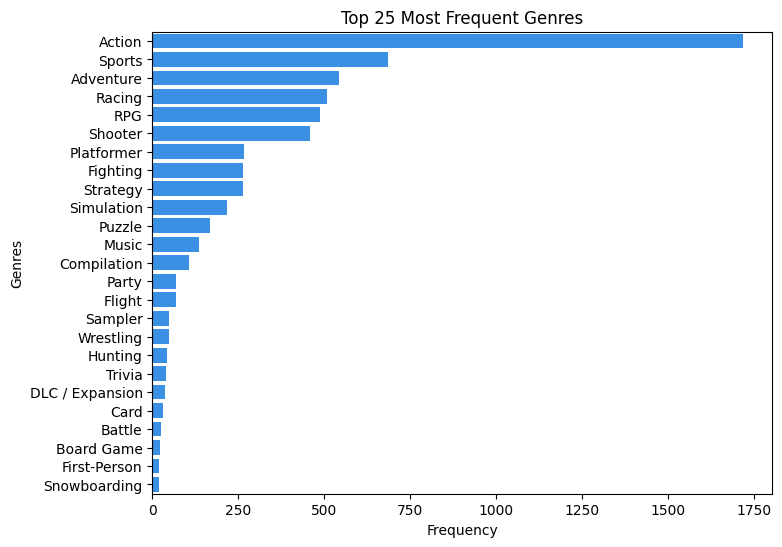

In [36]:
def one_hot_encoding(df):
    one_hot_encode_df = df.copy()
    one_hot_encode_df['Genres_IGN_str'] = one_hot_encode_df['Genres_IGN'].apply(lambda x: ','.join(x))
    genres_encoded = one_hot_encode_df['Genres_IGN_str'].str.get_dummies(sep=',')

    one_hot_encode_df = one_hot_encode_df.join(genres_encoded)
    columns_to_drop = ['Game', 'Publishers', 'Platforms', 'Genres_IGN', 'ESRB_Rating', 'NA_Sales', 'EU_Sales', 'JP_Sales',
                        'Other_Sales','Critic_Score', 'User_Score', 'Year_of_Release', 'Genres_IGN_str'] 
    genre_df = one_hot_encode_df.drop(columns=columns_to_drop)
    genre_columns = genre_df.drop(columns=['IGN_Score', 'Global_Sales']).columns

    return genre_columns, genre_df

genre_columns, genre_df = one_hot_encoding(merged_clean_df)

def Top_x_genres(genre_df,genre_columns, x):
    genre_frequencies = genre_df[genre_columns].sum().sort_values(ascending=False)
    top_x_genres = genre_frequencies.head(x)

    genre_stats = {}

    for genre in top_x_genres.index:
        genre_data = genre_df[genre_df[genre] == 1]  
        sales_stats = Confidence_Interval(genre_data['Global_Sales'])
        score_stats = Confidence_Interval(genre_data['IGN_Score'])
        
        genre_stats[genre] = {
            'Sales Mean': sales_stats['Mean'].values[0],
            'Sales CI Lower': sales_stats['CI Lower Bound'].values[0],
            'Sales CI Upper': sales_stats['CI Upper Bound'].values[0],
            'Score Mean': score_stats['Mean'].values[0],
            'Score CI Lower': score_stats['CI Lower Bound'].values[0],
            'Score CI Upper': score_stats['CI Upper Bound'].values[0]
        }

    genre_stats_df = pd.DataFrame(genre_stats).T
    return genre_frequencies, genre_stats_df

genre_frequencies, genre_stats_df = Top_x_genres(genre_df,genre_columns, x = 25)

def plot_top_x_genres(genre_frequencies, x=25):
    top_genres = genre_frequencies.head(x)
    plt.figure(figsize=(8, 6))
    bar_plot = sns.barplot(x=top_genres.values, y=top_genres.index, color='dodgerblue')
    bar_plot.set_title(f'Top {x} Most Frequent Genres')
    bar_plot.set_xlabel('Frequency')
    bar_plot.set_ylabel('Genres')
    plt.show()

# Plotting top 25 genres
plot_top_x_genres(genre_frequencies, x=25)

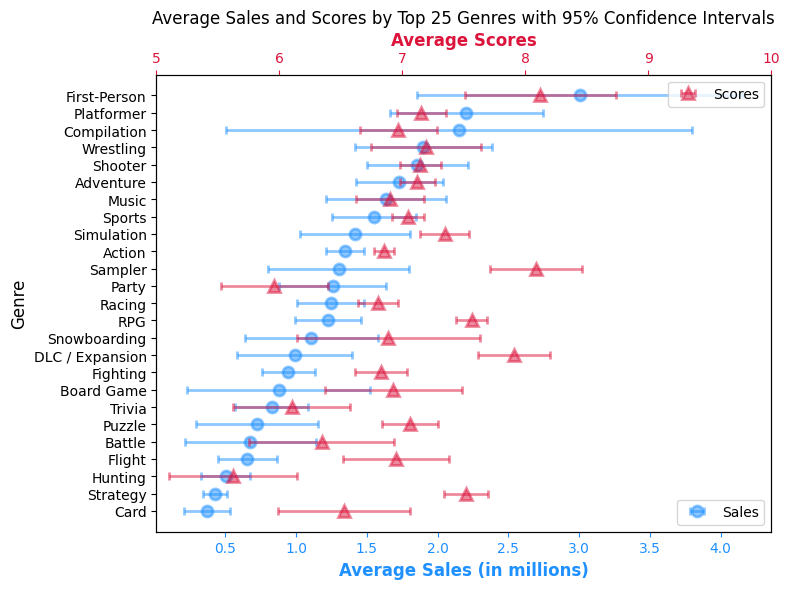

In [37]:
def plot_combined_error_bars(genre_stats_df):
    genre_stats_df = genre_stats_df.sort_values(by='Sales Mean', ascending=False)
    genres = genre_stats_df.index
    x = len(genre_stats_df)

    fig, ax1 = plt.subplots(figsize=(8, 6))

    # Sales
    x_sales = genre_stats_df['Sales Mean']
    lower_errors_sales = x_sales - genre_stats_df['Sales CI Lower']
    upper_errors_sales = genre_stats_df['Sales CI Upper'] - x_sales
    errors_sales = [lower_errors_sales, upper_errors_sales]

    ax1.errorbar(x_sales, genres, xerr=errors_sales, fmt='o', label='Sales', color='dodgerblue', ecolor='dodgerblue', alpha=0.5,
                 capsize=3, elinewidth=2, markeredgewidth=2, markersize=8)
    ax1.set_xlabel('Average Sales (in millions)', fontsize=12, fontweight='bold', color='dodgerblue')
    ax1.set_ylabel('Genre', fontsize=12)
    ax1.set_title(f'Average Sales and Scores by Top {x} Genres with 95% Confidence Intervals')

    # Scores
    x_scores = genre_stats_df['Score Mean']
    lower_errors_scores = x_scores - genre_stats_df['Score CI Lower']
    upper_errors_scores = genre_stats_df['Score CI Upper'] - x_scores
    errors_scores = [lower_errors_scores, upper_errors_scores]

    ax2 = ax1.twiny()
    ax2.errorbar(x_scores, genres, xerr=errors_scores, fmt='^', label='Scores', color='crimson', ecolor='crimson', alpha=0.5,
                 capsize=3, elinewidth=2, markeredgewidth=2, markersize=8)
    ax2.set_xlabel('Average Scores', fontsize=12, fontweight='bold', color='crimson')
    ax2.set_xlim(5, 10)
    
    ax1.tick_params(axis='x', colors='dodgerblue')
    ax2.tick_params(axis='x', colors='crimson')

    ax1.legend(loc='lower right')
    ax2.legend(loc='upper right')

    ax1.invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plotting the adjusted chart
plot_combined_error_bars(genre_stats_df)

## Geographic Heatmap Analysis of Video Game Scores and Sales

In [38]:
def folium_heatmap(df_input, columns):
    df = df_input.copy()

    # load world geometries and merge with data
    world = gpd.read_file("./data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
    world = world.rename(columns={'NAME': 'Country'})
    merged = world.merge(df, how='inner', on='Country')
    
    # create GeoJSON for Folium
    geo_data = merged[['Country', 'geometry']].to_json()

    # create a Folium map
    m = folium.Map(location=[0, 0], zoom_start=1)

    # add Choropleth layer for each column
    for column in columns:
        Choropleth(
            geo_data=geo_data,
            name=column,
            data=merged,
            columns=['Country', column],
            key_on='feature.properties.Country',
            fill_color='YlOrRd',
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name=f'{column} by Country'
        ).add_to(m)

    # add a layer control panel to the map
    folium.LayerControl().add_to(m)

    return m

# list of columns to create layers for
columns = ['IGN_Score', 'User_Score', 'Critic_Score', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

folium_heatmap(country_df, columns)

## Sales proportion of top 10 publishers across different region

Sales data are cummulative. We can not directly compare the sales over the release date, as the later released game will have fewer sales compared to the earlier one. Normalize Sales by Time Since Release may not be a good solution because, in reality, video game sales often follow an exponential decay model, and it is tricky to estimate the decay rate.
To due with this issue, we group the sales data by release year, and compare the top n publishers **within the same period of release year**.

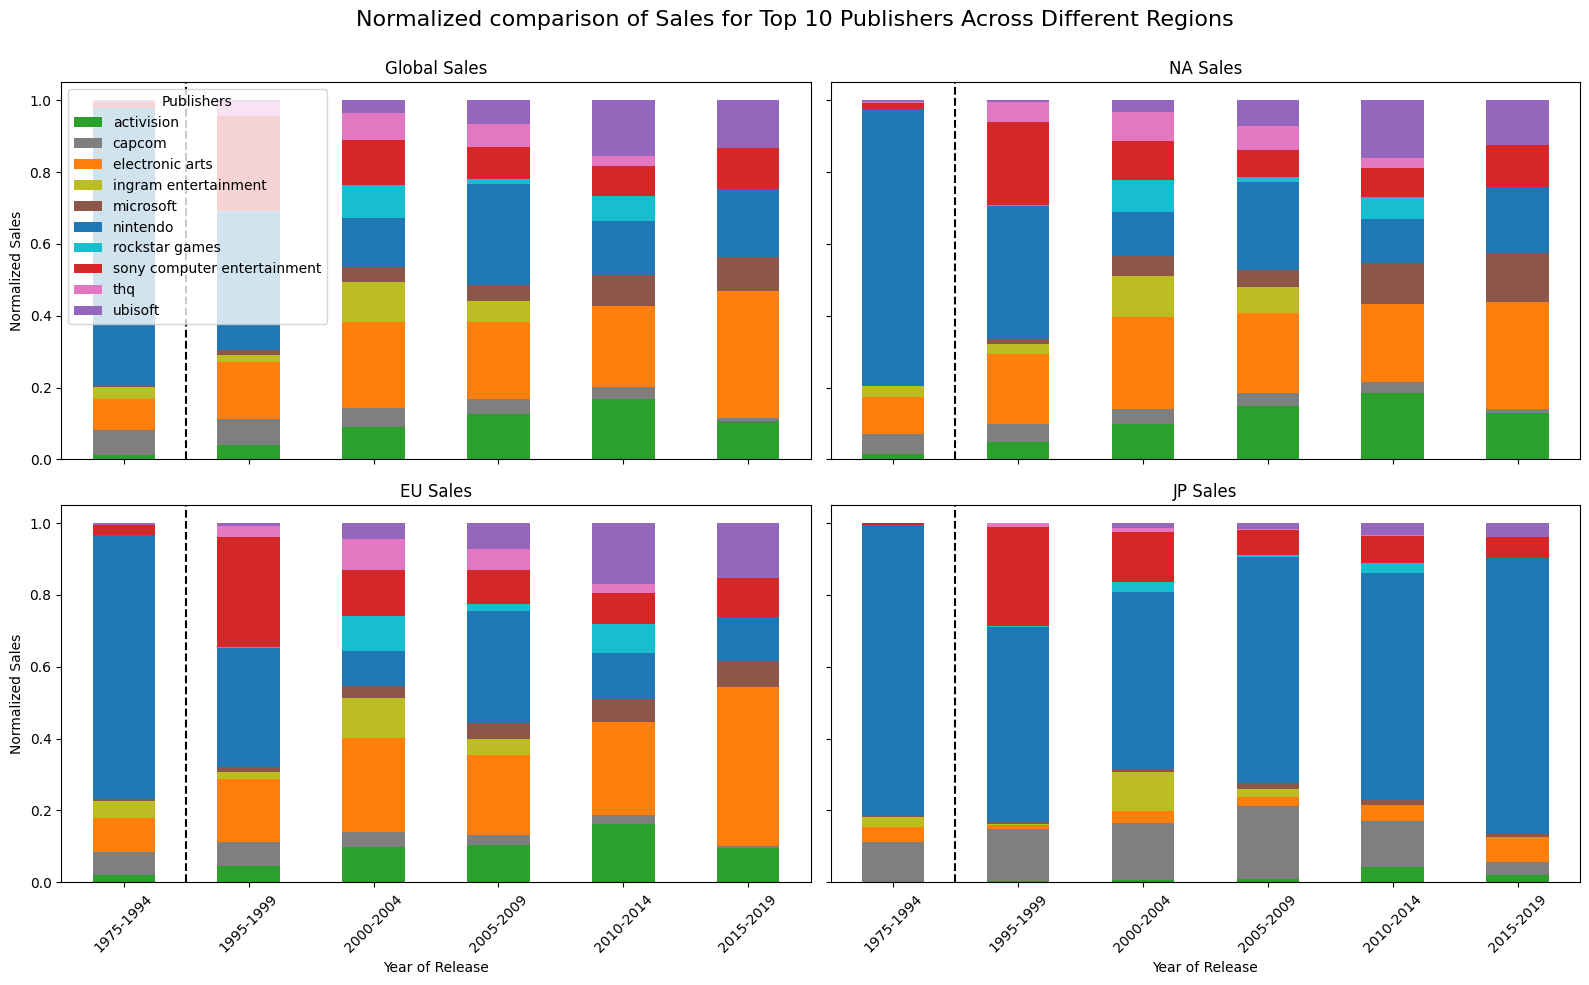

In [39]:
def grouped_bar_chart(df_input, top):
    df = df_input.copy()
    sales_regions = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales']

    # 5-year groups, group all before 1995 as one due to lack of data
    df['Year_Group'] = df['Year_of_Release'].apply(lambda x: f'{(x//5)*5}-{(x//5)*5 + 4}' if x >= 1995 else '1975-1994')
    

    # identify top n publishers by total global sales
    top_publishers = df.groupby('Publishers')[sales_regions[0]].sum().nlargest(top).index

    # color palette
    color_palette = sns.color_palette("tab10", n_colors=top)

    # create a dictionary mapping publishers to colors
    color_map = dict(zip(top_publishers, color_palette))

    # create a 2 by 2 grid layout for the subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)
    axs = axs.flatten()

    for i, sales_region in enumerate(sales_regions):
        # filter data for top n publishers
        df_top_publishers = df[df['Publishers'].isin(top_publishers)].copy()

        # group by year group and publisher, then sum sales
        grouped_data = df_top_publishers.groupby(['Year_Group', 'Publishers'])[sales_region].sum().unstack()

        # normalize the sales within each 5-year period
        normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

        # plot grouped bar chart with consistent colors
        normalized_data.plot(kind='bar', stacked=True, ax=axs[i], \
                                color=[color_map[col] for col in normalized_data.columns])

        axs[i].set_xlabel('Year of Release')
        axs[i].set_ylabel('Normalized Sales')
        axs[i].set_title(sales_region.replace('_', ' '))
        if i == 0:
            axs[i].legend(title='Publishers')
        else:
            axs[i].get_legend().remove()
        axs[i].tick_params(axis='x', rotation=45)

        # add vertical line to highlight the lack of data issue
        year_groups = list(normalized_data.index)
        idx_1994 = year_groups.index('1975-1994')
        idx_1995 = year_groups.index('1995-1999')
        axs[i].axvline(x=(idx_1994 + idx_1995) / 2, color='black', linestyle='--')


        # hide y-axis for right side charts
        if i % 2 != 0:
            axs[i].set_ylabel('')
            axs[i].set_yticklabels([])

    fig.suptitle(f'Normalized comparison of Sales for Top {top} Publishers Across Different Regions', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

grouped_bar_chart(publisher_df, 10)